<a href="https://colab.research.google.com/github/Afsah-Hyder/CV_recitation/blob/main/CV_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#For Q3.
# Specify the proportion of data for the validation set (e.g., 20%)
test_size = 0.2

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(
    x_train, y_train, test_size=test_size, random_state=42
)

170498071/170498071 [==============================] - 13s 0us/step


**CIFAR-10 Dataset:** The dataset contains 60,000 32x32 color (rgb) images categorized into 10 classes. It is a well-known benchmark dataset utilized for training and assessing machine learning algorithms, especially those designed for image recognition. Out of these 60,000 images, 50k are reserved for training and the remaining 10k for test. The 10 classes are: airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Each class contains 6k images.


**Preprocessing steps:** In the preprocessing phase of image data, various steps are undertaken to optimize the image for analysis. These steps encompass noise reduction, contrast enhancement, image resizing, color correction, segmentation, feature extraction, among others. Noise reduction methodologies focus on eliminating unwanted elements, such as variations in lighting, while preserving the image's crucial characteristics. Contrast enhancement procedures are employed to heighten the distinction between different features within the image. Image resizing and color correction techniques play roles in adjusting the image's dimensions and color balance, respectively. Segmentation approaches divide the image into distinct regions based on its content, and feature extraction methods identify and extract important features. This preprocessing is vital in image analysis, contributing to improved data quality and reduced visual clutter.

**Q2.**

In [ ]:
import numpy as np
def calc(input,filter,padds,padding):
  if padding:
    input=np.pad(input,(padds, padds), constant_values=0)  # diff options available if different type of padding required along diff axis
  output=np.zeros((len(input)-2*padds,len(input)-2*padds))
  for i in range(padds,len(input)-padds):
    for j in range(padds,len(input[i])-padds):
      sum=input[i][j]*filter[padds][padds]
      for k in range(1,padds+1):
        sum+= input[i-k][j-k]*filter[padds-k][padds-k]+ input[i-k][j]*filter[padds-k][padds]+ input[i][j-k]*filter[padds][padds-k]+ input[i+k][j-k]*filter[padds+k][padds-k]+ input[i+k][j]*filter[padds+k][padds]+ input[i][j+k]*filter[padds][padds+k]+ input[i-k][j+k]*filter[padds-k][padds+k]+ input[i+k][j+k]*filter[padds+k][padds+k]
      output[i-padds][j-padds]=sum
  return output


def filt(input,filter,padding,normalization):
  if normalization: filter=filter/np.sum(filter)
  filter_num=len(filter)
  padds=int((filter_num-1)/2)    #pad width

  if input.ndim==3:
    output_0=calc(input[0],filter,padds,padding)
    output_1=calc(input[1],filter,padds,padding)
    output_2=calc(input[2],filter,padds,padding)

    for i in range(0,len(output_0)):
      for j in range(0,len(output_0)):
        output_0[i][j]=output_0[i][j]+output_1[i][j]+output_2[i][j]
    return output_0
  elif input.ndim==2:
    output=calc(input,filter,padds,padding)
    return output



def printer(output):
  for i in range(len(output)):
    for j in range(len(output[i])):
      print(output[i][j], ", ")
    print("\n")

filter=np.ones((3,3))
image3=np.array([[[3,4,12,2,5],[3,14,27,20,15],[3,14,12,21,25],[2,3,7,8,9],[2,3,6,4,11]],[[3,4,12,2,5],[3,14,27,20,15],[3,14,12,21,25],[2,3,7,8,9],[2,3,6,4,11]],[[3,4,12,2,5],[3,14,27,20,15],[3,14,12,21,25],[2,3,7,8,9],[2,3,6,4,11]]]) #3D
image2=np.array([[3,4,12,2,5],[3,14,27,20,15],[3,14,12,21,25],[2,3,7,8,9],[2,3,6,4,11]])   #2D

output=filt(image3,filter,1,0)
printer(output)




72.0 , 
189.0 , 
237.0 , 
243.0 , 
126.0 , 


123.0 , 
276.0 , 
378.0 , 
417.0 , 
264.0 , 


117.0 , 
255.0 , 
378.0 , 
432.0 , 
294.0 , 


81.0 , 
156.0 , 
234.0 , 
309.0 , 
234.0 , 


30.0 , 
69.0 , 
93.0 , 
135.0 , 
96.0 , 




**Q3.** Extract HOG features from the CIFAR-10 dataset, and train a Linear SVM using those features. You are
expected to reach around 45% accuracy on test data using this method.

In [ ]:
from skimage.feature import local_binary_pattern, hog
import cv2
from sklearn.svm import SVC
from os import listdir
from google.colab.patches import cv2_imshow
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
def preprocess(img):
  x_hog=[]
  for i in range(len(img)):
    gray=cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY)/255
    Xp,hog_img=hog(gray, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
    x_hog.append(Xp)
  return x_hog

In [ ]:
width=32
height=32

print("Extract Histogram of Gradients features for training, validation and testing datasets:\n")

Xtrain_d0= preprocess(X_train)
Xval_d0 =preprocess(X_val)
Xtest_d0 = preprocess(x_test)

Extract Histogram of Gradients features for training, validation and testing datasets:



In [ ]:
ytrain=Y_train.reshape(-1)
yval=Y_val.reshape(-1)
ytest=y_test.reshape(-1)
print(ytrain)

[6 2 5 ... 8 8 8]


In [ ]:
def SVM(Xtrain,Ytrain,Xval,Yval):
  print("--------Support Vector Machine--------\n")
  #Define SVM Classifier
  clf = SVC(random_state=0)
  #train the classifier
  clf.fit(Xtrain,Ytrain)
  #Calculate accuracy of the model using validation set
  print("Accuracy Train set",clf.score(Xtrain,Ytrain)*100)
  #Calculate accuracy of the model using validation set
  print("Accuracy Valid set",clf.score(Xval,Yval)*100)
  #plot confusion matrix
  #get_confusion_matrix(clf,Xval,Yval,"Validation")

# Compute and check the classifier for dataset #0:
print("-------- dataset #0--------\n")
SVM(Xtrain_d0,ytrain,Xval_d0,yval)


-------- dataset #0--------

--------Support Vector Machine--------

Accuracy Train set 79.5725
Accuracy Valid set 61.309999999999995


In [ ]:
svm=SVC(random_state=0)
svm.fit(Xtrain_d0,ytrain)
print("Accuracy Test set for SVM: ",svm.score(Xtest_d0,ytest)*100)

Accuracy Test set for SVM:  61.4


**Q4**

In [14]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

import torch
import torchvision
import torch.nn.functional as F # Contains all the activation functions
import torch.nn as nn # The Neural Network
import torch.optim as optim # The Optimizer
import torchvision.transforms as transforms # The Tranform to be used
from torch.utils.data import DataLoader # Dataloader

In [17]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize

# Download and transform the MNIST dataset
transform = ToTensor()  # Convert data to PyTorch tensors
trainset = datasets.MNIST('./data', train=True, download=True, transform=transform)
testset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Define data loaders for training and testing
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=32, shuffle=False)


a. Create a feed forward neural network consisting of only fully connected layers; the network should have at least
two hidden layers. You are allowed to experiment with regularization techniques and are expected to reach above
55% accuracy on test data

In [12]:
import torch
from torch import nn

# Set random seed for consistency
torch.manual_seed(1234)

# Define the model class
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),  # Flatten the input from (784,) to (784) for dense layers
        nn.Linear(784, 250),
        nn.ReLU(inplace=True),  # ReLU activation with inplace modification
        nn.Linear(250, 100),
        nn.ReLU(inplace=True),
        nn.Linear(100, 45),
        nn.ReLU(inplace=True),
        nn.Linear(45, 20),
        nn.ReLU(inplace=True),
        nn.Linear(20, 10),
    )

  def forward(self, x):
    x = self.layers(x)
    return x

# Create an instance of the model
model = MyModel()

# Define the loss function (same as TensorFlow)
criterion = nn.CrossEntropyLoss()

In [8]:
print(model)

MyModel(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=250, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=250, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): Linear(in_features=100, out_features=45, bias=True)
    (6): ReLU(inplace=True)
    (7): Linear(in_features=45, out_features=20, bias=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=20, out_features=10, bias=True)
  )
)


In [ ]:
# Define the model, loss function, and optimizer

model = MyModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    correct_train = 0
    correct_val = 0
    total_train = 0
    total_val = 0

    # Training Loop
    for images, labels in trainloader:
        # Reshape images to flatten them
        images = images.view(-1, 28 * 28)

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Perform a single optimization step (parameter update)
        optimizer.step()

        # Update training loss
        train_loss += loss.item()

        # Convert output probabilities to predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Total number of labels
        total_train += labels.size(0)

        # Total correct predictions
        correct_train += (predicted == labels).sum().item()


    with torch.no_grad():     # to stop calculating gradients
        for images, labels in testloader:
            images = images.view(-1, 28 * 28) # Reshape images to flatten them
            outputs = model(images)# Forward pass: compute predicted outputs by passing inputs to the model
            loss = criterion(outputs, labels)# Calculate the loss
            val_loss += loss.item()# Update validation loss
            _, predicted = torch.max(outputs.data, 1)# Convert output probabilities to predicted class
            total_val += labels.size(0) # Total number of labels
            correct_val += (predicted == labels).sum().item() # Total correct predictions



    # Compute average training loss and accuracy for the epoch
    train_losses.append(train_loss / len(trainloader))
    train_acc = correct_train / total_train
    train_accs.append(train_acc)

     # Compute average validation loss and accuracy for the epoch
    val_losses.append(val_loss / len(testloader))
    val_acc = correct_val / total_val
    val_accs.append(val_acc)

    # Print training loss and accuracy for the epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_acc:.4f}')
    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_acc:.4f}')

Epoch [1/10], Training Loss: 0.3436, Training Accuracy: 0.8953
Epoch [1/10], Validation Loss: 0.1546, Validation Accuracy: 0.9546
Epoch [2/10], Training Loss: 0.1224, Training Accuracy: 0.9640
Epoch [2/10], Validation Loss: 0.1475, Validation Accuracy: 0.9574
Epoch [3/10], Training Loss: 0.0838, Training Accuracy: 0.9748
Epoch [3/10], Validation Loss: 0.0856, Validation Accuracy: 0.9728
Epoch [4/10], Training Loss: 0.0625, Training Accuracy: 0.9808
Epoch [4/10], Validation Loss: 0.0912, Validation Accuracy: 0.9746
Epoch [5/10], Training Loss: 0.0503, Training Accuracy: 0.9845
Epoch [5/10], Validation Loss: 0.0794, Validation Accuracy: 0.9783
Epoch [6/10], Training Loss: 0.0406, Training Accuracy: 0.9876
Epoch [6/10], Validation Loss: 0.1072, Validation Accuracy: 0.9718
Epoch [7/10], Training Loss: 0.0339, Training Accuracy: 0.9895
Epoch [7/10], Validation Loss: 0.0961, Validation Accuracy: 0.9737
Epoch [8/10], Training Loss: 0.0298, Training Accuracy: 0.9905
Epoch [8/10], Validation Lo

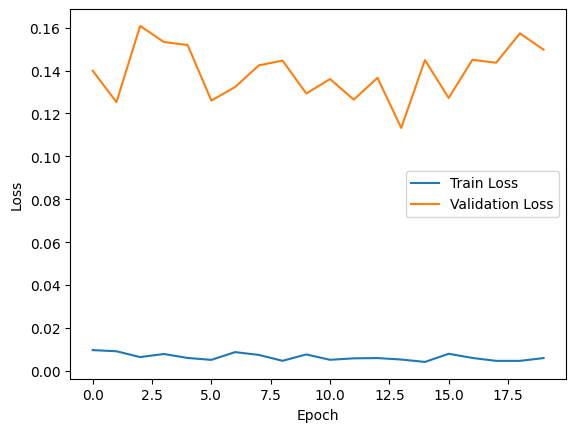

In [ ]:
plt.plot(train_accs, label='Train Loss')
plt.plot(val_accs, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

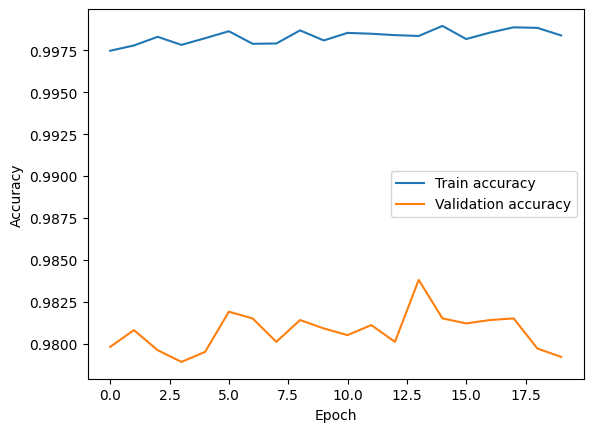

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

b. Create a convolutional neural network consisting of at least two convolutional layers. You are allowed to
experiment with regularization techniques and are expected to reach above 75% accuracy on test data.

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#load cifar10 dataset here #_________TODO_________
(x_train, y_train), (x_val, y_val) = mnist.load_data()

#shuffle dataset here #_________TODO_________
x_train, y_train=shuffle(x_train, y_train)

#normalize your data #_________TODO_________
x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0

#define number of classes #_________TODO_________
num_classes=10

#one-hot encode the labels
y_train_1hot = keras.utils.to_categorical(y_train, num_classes=10)
y_val_1hot   = keras.utils.to_categorical(y_val, 10)

print('1hot shapes: (train, val) :- ', y_train_1hot.shape, y_val_1hot.shape)



11490434/11490434 [==============================] - 2s 0us/step
1hot shapes: (train, val) :-  (60000, 10) (10000, 10)


In [ ]:
model = keras.Sequential([
    #add conv2D layer #_______TODO_______
    Conv2D(filters=32, kernel_size=(3, 3),activation='relu', input_shape=(28,28,1)),

    #add maxpooling2D layer #_______TODO_______
    MaxPooling2D(pool_size=(2, 2)),

    #add conv2D layer #_______TODO_______
    Conv2D(filters=64, kernel_size=(3, 3),activation='relu'),
    #add maxpooling2D layer #_______TODO_______
    MaxPooling2D(pool_size=(2, 2)),

    #add conv2D layer #_______TODO_______
    Conv2D(filters=128, kernel_size=(3, 3),activation='relu'),
    #add maxpooling2D layer #_______TODO_______
    MaxPooling2D(pool_size=(2, 2)),

    #add flatten layer #_______TODO_______
    Flatten(),
    #add dense layer   #_______TODO_______
    Dense(512, activation="relu"),
    #add dense layer   #_______TODO_______
    Dense(10, activation="softmax")
])

#compile model-> compile means to configure training in Keras API
optimizer = 'SGD'# define SGD as your gradient descent algorithm
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

In [ ]:
#train the model #_______TODO_______
history = model.fit(
    x_train,y_train_1hot,
    epochs=50,
    validation_data=(x_val, y_val_1hot)
)

Epoch 1/50
1875/1875 [==============================] - 13s 5ms/step - loss: 0.9035 - accuracy: 0.7320 - val_loss: 0.2351 - val_accuracy: 0.9234
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1804 - accuracy: 0.9442 - val_loss: 0.1259 - val_accuracy: 0.9612
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1298 - accuracy: 0.9597 - val_loss: 0.0940 - val_accuracy: 0.9713
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1053 - accuracy: 0.9677 - val_loss: 0.0801 - val_accuracy: 0.9759
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0885 - accuracy: 0.9727 - val_loss: 0.0784 - val_accuracy: 0.9761
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0793 - accuracy: 0.9753 - val_loss: 0.0768 - val_accuracy: 0.9778
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0695 - accuracy: 0.9785 - val_loss: 0.0704 - val_accuracy

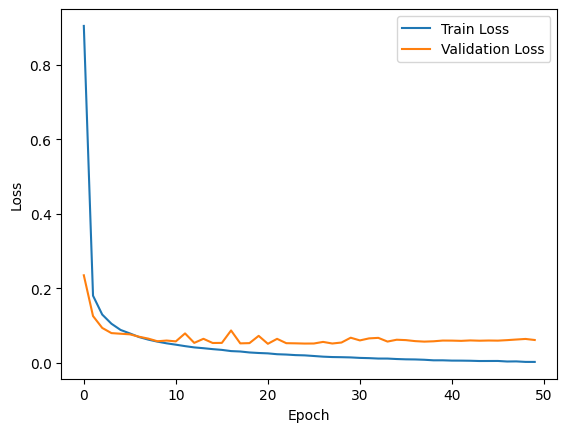

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

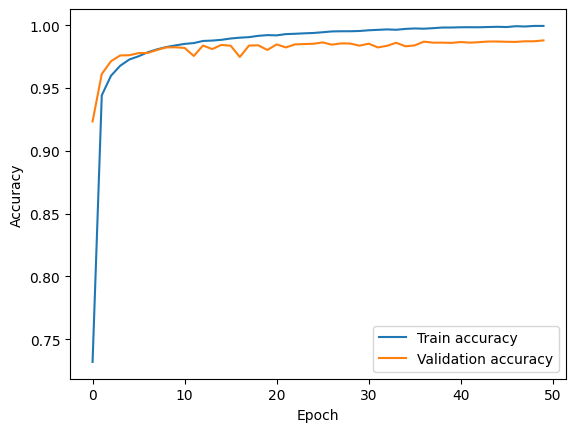

In [ ]:
#plot accuracy using plt.plot() and plt.legend() #_______TODO_______
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

c. Use the pre-trained VGG-16 network (trained on ImageNet) as a feature extractor, and connect it to a feed
forward network consisting of fully connected layers. You should try to fine tune the network and are expected
to reach above 65% accuracy on test data

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# Create the VGG16 model, specifying include_top=False to exclude the classification layers
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Print a summary of the model layers to understand its architecture
model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def preprocess_mnist_image(mnist_image):
  # Reshape to add channel dimension
  mnist_image = np.expand_dims(mnist_image, axis=-1)

  # Resize to match VGG16 input size
  img = image.array_to_img(mnist_image, scale=False)  # Avoid normalization
  img = img.resize((224, 224), interpolation=image.BICUBIC)  # Experiment with interpolation
  img = image.img_to_array(img)

  # Optional: Replicate channel (consider alternative preprocessing for grayscale)
  img = np.repeat(img, 3, axis=-1)

  return preprocess_input(img)[np.newaxis, ...]  # Add batch dimension and preprocess

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications.vgg16 import preprocess_input

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to add a channel dimension (optional, padding might be preferred)
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Alternatively, pad with zeros (might distort aspect ratio)
x_train = np.pad(x_train, ((0, 0), (48, 48), (48, 48)), mode='constant')
x_test = np.pad(x_test, ((0, 0), (48, 48), (48, 48)), mode='constant')

# Normalize (consider alternative scaling for MNIST)
x_train = x_train.astype('float32') / 255  # Simple scaling to 0-1
x_test = x_test.astype('float32') / 255

# VGG-16 expects RGB, comment out if using padding instead of reshaping
# x_train = np.repeat(x_train, 3, axis=3)  # Duplicate channel for RGB
# x_test = np.repeat(x_test, 3, axis=3)

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
# Create a new model using only the feature extraction part of VGG-16
feature_extractor = Model(inputs=model.input, outputs=model.output)

In [ ]:
x = feature_extractor.output  # Input to the FFNN is the output from the feature extractor

# Add a Flatten layer to convert the feature maps into a 1D vector
x = Flatten()(x)
num_classes=10
# Add Dense layers for classification (adjust the number of neurons and activation functions as needed)
x = Dense(units=1024, activation='relu')(x)  # Example dense layer
x = Dense(units=512, activation='relu')(x)  # Example dense layer
x = Dense(units=256, activation='relu')(x)  # Example dense layer
x = Dense(units=128, activation='relu')(x)  # Example dense layer
x = Dense(units=64, activation='relu')(x)  # Example dense layer
x = Dense(units=num_classes, activation='softmax')(x)  # Output layer with softmax for multi-class classification

# Replace 'num_classes' with the number of classes in your classification problem
# Adjust the number of Dense layers, units, and activation functions based on your task complexity

# Create the final model by combining the feature extractor and FFNN
model2 = Model(inputs=feature_extractor.input, outputs=x)

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))